In [1]:
!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!nvcc -V

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 90.9 MB/s eta 0:00:01tcmalloc: large alloc 1821442048 bytes == 0x3c9c000 @  0x7fbf346151e7 0x4d30a0 0x4d312c 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x5d8868 0x4997a2 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4997a2
tcmalloc: large alloc 2276802560 bytes == 0x705ac000 @  0x7fbf34616615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x5d8868 0x4997a2 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 67.8 MB/s 

In [2]:
!git clone https://github.com/hukaixuan19970627/yolov5_obb.git

Cloning into 'yolov5_obb'...
remote: Enumerating objects: 704, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 704 (delta 157), reused 141 (delta 91), pack-reused 475
Receiving objects: 100% (704/704), 18.23 MiB | 6.51 MiB/s, done.
Resolving deltas: 100% (292/292), done.


In [3]:
%cd /content/yolov5_obb/
!pip install -r requirements.txt

/content/yolov5_obb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%cd utils/nms_rotated
!python setup.py develop  #or "pip install -v -e ."

/content/yolov5_obb/utils/nms_rotated
running develop
running egg_info
creating nms_rotated.egg-info
writing nms_rotated.egg-info/PKG-INFO
writing dependency_links to nms_rotated.egg-info/dependency_links.txt
writing top-level names to nms_rotated.egg-info/top_level.txt
writing manifest file 'nms_rotated.egg-info/SOURCES.txt'
/usr/local/lib/python3.8/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
writing manifest file 'nms_rotated.egg-info/SOURCES.txt'
running build_ext
/usr/local/lib/python3.8/dist-packages/torch/utils/cpp_extension.py:782: UserWarning: The detected CUDA version (11.2) has a minor version mismatch with the version that was used to compile PyTorch (11.3). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.c

In [5]:
%cd /content
!mkdir /content/datasets/

/content


In [7]:
%cd /content/datasets/
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YEYbt8czuptULvvukIsy")
project = rf.workspace("vaishnavi-kamdi-ariik").project("ui-elements-detection")
dataset = project.version(1).download("yolov5")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to UI-elements-detection-1 in yolov5pytorch:: 100%|██████████| 1218/1218 [00:00<00:00, 2377.55it/s]


In [8]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.6 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=c3bfd96787225f0b5b8357aca924737871675868976f33f0607581f2d1fa0dfb
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.6
    Uninstalling urllib3-1.26.6:
      Successfully uninstalled urllib3-1.26.6
ERROR: p

In [10]:
%cd /content/yolov5_obb/
!python train.py --data {dataset.location}/data.yaml --epochs 1000 --batch-size 1 --img 1024 --device 0 --exist-ok


/content/yolov5_obb
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 1
wandb: You chose 'Create a W&B account'
wandb: Create an account here: https://wandb.ai/authorize?signup=true
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
train: weights=weights/yolov5n.pt, cfg=, data=/content/datasets/UI-elements-detection-1/data.yaml, hyp=data/hyps/obb/hyp.finetune_dota.yaml, epochs=1000, batch_size=1, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, u

In [11]:
1
%cd /content/yolov5_obb/

/content/yolov5_obb


In [12]:
!python detect.py --weights 'runs/train/exp/weights/best.pt' --source '../datasets/roboflow/valid/images' --conf-thres 0.01 --img 416 --device 0 --agnostic

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/roboflow/valid/images, imgsz=[416, 416], conf_thres=0.01, iou_thres=0.2, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 b00c3f2 torch 1.10.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Traceback (most recent call last):
  File "detect.py", line 251, in <module>
    main(opt)
  File "detect.py", line 246, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 80, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn)
  File "/content/yolov5_obb/models/common.py", line 309, in __init__
    model = attempt_load(we

In [ ]:
%cd /content/yolov5_obb/runs/detect/exp/

/content/yolov5_obb/runs/detect/exp


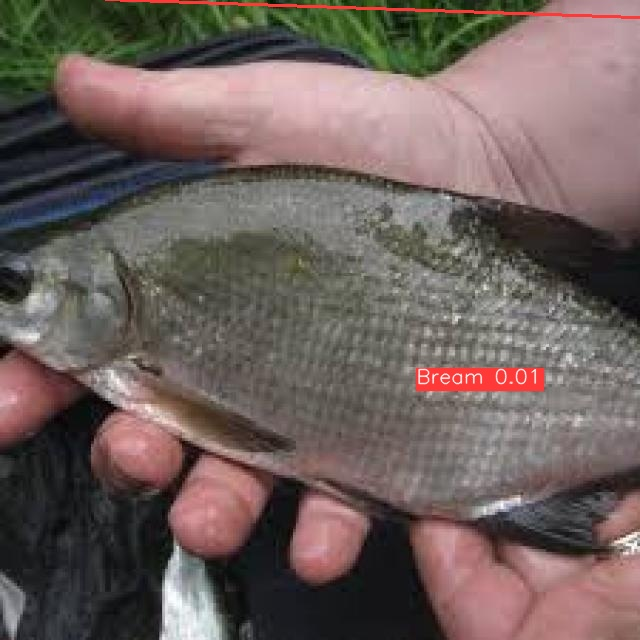

In [ ]:
import os, random
random_file = random.choice(os.listdir("/content/yolov5_obb/runs/detect/exp"))

from IPython.display import Image
Image(random_file)